In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('meal_order_detail.csv')

current_date = '2020-10-1' # Edit this date as needed
current_date_dt = pd.to_datetime(current_date)
data['Checkout Time'] = pd.to_datetime(data['Checkout Time'], format='%H:%M:%S')
data['Checkout Time'] = current_date_dt + pd.to_timedelta(data['Checkout Time'].dt.hour, unit='h') + \
                        pd.to_timedelta(data['Checkout Time'].dt.minute, unit='m') + \
                        pd.to_timedelta(data['Checkout Time'].dt.second, unit='s')
data.dropna(axis=1, inplace=True) # Drop columns containing NA values from the data DataFrame and modify the original data in place

In [3]:
data

,Order ID,Checkout Time,Dishes ID,Dishes Name,Counts,Unit Price
0,1,2020-10-01 10:36:21,14,Chow Mein,1,11.0
1,1,2020-10-01 10:36:21,7,Beef with Broccoli,2,17.0
2,1,2020-10-01 10:36:21,11,Mapo Tofu,2,10.0
3,1,2020-10-01 10:36:21,12,Mushroom Soup,1,6.5
4,1,2020-10-01 10:36:21,15,Rice,4,2.5
...,...,...,...,...,...,...
74,12,2020-10-01 21:55:42,3,Szechwan Chilli Chicken,5,16.0
75,12,2020-10-01 21:55:42,4,Sweet and Sour Pork,1,12.5
76,12,2020-10-01 21:55:42,14,Chow Mein,6,11.0
77,12,2020-10-01 21:55:42,9,Salt and Pepper Shrimp,1,20.0


In [4]:
data.dtypes

Order ID                  int64
Checkout Time    datetime64[ns]
Dishes ID                 int64
Dishes Name              object
Counts                    int64
Unit Price              float64
dtype: object

In [5]:
# Calculate the average price of the dishes sold
np.mean(data['Unit Price'])

13.39240506329114

In [6]:
# Frequency analysis: Which dishes are in the top 10 most popular
dishes_count = data['Dishes Name'].value_counts()[:10]
dishes_count

Dishes Name
Rice                       9
Chow Mein                  8
Kung Pao Chicken           8
Skillet Beef               6
Peking Roast Duck          6
Oil Braised King Prawns    6
Mapo Tofu                  5
Mushroom Soup              5
Wonton Soup                5
Sweet and Sour Pork        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Most Popular Dishes')

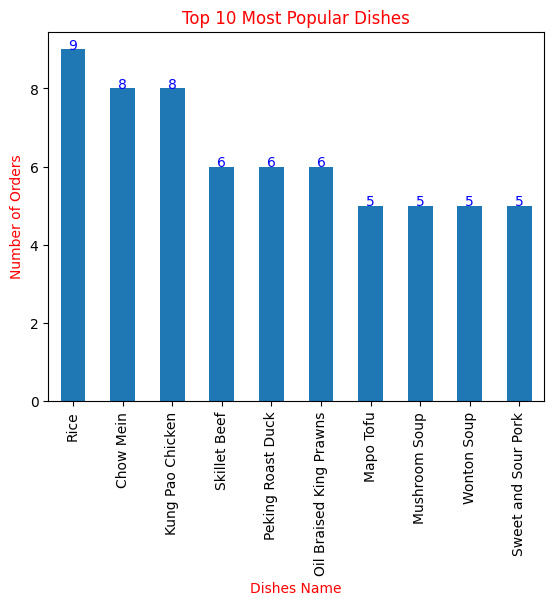

In [7]:
# Data Visualization
dishes_count.plot(kind='bar')
for x,y in enumerate(dishes_count):
    plt.text(x, y, y, ha='center', color='blue')
plt.xlabel('Dishes Name', color='red')
plt.ylabel('Number of Orders', color='red')
plt.title('Top 10 Most Popular Dishes', color='red')

In [8]:
# Find the order with the greatest number of dish categories
most_variety = data['Order ID'].value_counts()[:1]
print(f"Order ID: {most_variety.index[0]}, Category Count: {most_variety.iloc[0]}")

Order ID: 3, Category Count: 9


In [32]:
# Print the total price of each order in descending order
data['Total Price'] = data['Counts']*data['Unit Price']
dataGroup = data[['Order ID','Total Price']].groupby(by='Order ID').sum().sort_values(by='Total Price',ascending=False)
print(dataGroup)

          Total Price
Order ID             
7               264.0
12              261.5
2               261.0
3               237.5
6               190.0
4               181.0
8               157.0
10              139.0
1               137.0
9               130.0
11              127.5
5               123.0
